# 전처리
- 중복데이터 삭제 및  (이전 노트북 : Youtube trending video analysis_self_obtained_dataset 참고)
- Column 이해 및 필요없는 column 삭제
- Categorical variable 가변수(dummy variable) 만들기
- 상수항 결합(bias augmentation)
- 설명변수 & 반응변수 설정
- 학습데이터&평가데이터 분할


In [2]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

In [4]:
Data = pd.read_csv("output/youtube_trending_video_columns_modified.csv")

In [5]:
Data.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,subscriber_count,tag_count,trend_date_diff,appeared_morethanonce,published_trend_diff
0,0,sEoF2oIcjBs,[놀면뭐하니? 예고] 놀면뭐하니를 찾아온 댄스 레전드 비! (feat. 깡),2020-05-14,UCx6jsZ02B4K3SECUrkgPyzg,놀면 뭐하니?,Entertainment,2020-05-16,유재석|김태호|무한도전|유플래시|유산슬|뽕포유|라섹|유르페우스|놀면 뭐하니|놀뭐|무...,1848154,...,8593,https://i.ytimg.com/vi/sEoF2oIcjBs/default.jpg,False,False,[놀면 뭐하니?] 토요일 저녁 6시 30분 방송!,55.70,19,0,0,2
1,1,iK3kwZY6epY,자간을 물리치는 가은｜10화 하이라이트｜신비아파트 고스트볼 더블X : 6개의 예언｜...,2020-05-15,UCoHsxU1eDWHom6D7Fce6kLA,신비아파트 공식 채널,Film & Animation,2020-05-16,신비아파트|신비아파트고스트볼X의탄생|고스트볼X의탄생|고스트볼X|신비아파트두번째이야기...,511896,...,1422,https://i.ytimg.com/vi/iK3kwZY6epY/default.jpg,False,False,신비아파트 고스트볼 더블X : 6개의 예언10화 하이라이트 : 자간을 물리치는 가은...,38.40,39,0,0,2
2,2,atD5O2XCbLw,죄수와 검사Ⅱ(한명숙) ③ 나는 검찰의 개였다 한만호 비망록 단독 입수 - 뉴스타파,2020-05-14,UCeFUGS2VCOb6DO3BiUgvwNA,newstapa,News & Politics,2020-05-16,탐사보도|진실|뉴스타파,273057,...,2199,https://i.ytimg.com/vi/atD5O2XCbLw/default.jpg,False,False,'한명숙 뇌물사건'의 핵심 증인인 한만호 씨의 옥중 비망록을 뉴스타파가 입수했습니다...,53.10,3,0,0,3
3,3,O9e2oZXEKW8,아이유가 포스트말론 맞팔한 이유? 본인등판에서 확인하기🙋 | IU_ eight(에잇...,2020-05-12,UCqq-ovGE01ErlXakPihhKDA,1theK Originals - 원더케이 오리지널,Entertainment,2020-05-16,아이유|아이유 에잇|아이유 신곡|아이유 BTS|슈가|포스트말론 아이유|아이유 본인등...,2188640,...,7115,https://i.ytimg.com/vi/O9e2oZXEKW8/default.jpg,False,False,아이유가 포스트말론 맞팔한 이유? 본인등판에서 확인하기🙋 | IU_ eight(에잇...,NaN,16,0,0,5
4,4,mB9HK4-g27Q,독일 공영방송 도이체벨레(DW) 강경화 외교부 장관 인터뷰 [한글자막 CC /ENG...,2020-05-14,UCwRFj9gC3meixU8fqKJdgxA,"외교부 Ministry of Foreign Affairs, Korea",Nonprofits & Activism,2020-05-16,도이체벨레|독일|공영방송|강경화|외교|외교장관|코로나19|코로나|외교부|강경화장관|...,333869,...,2391,https://i.ytimg.com/vi/mB9HK4-g27Q/default.jpg,False,False,강경화 외교부 장관이 독일 공영방송 도이체벨레(DW)와 인터뷰(2020.5.14.)...,8.07,16,0,0,5


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 22 columns):
Unnamed: 0               559 non-null int64
video_id                 559 non-null object
title                    559 non-null object
publishedAt              559 non-null object
channelId                559 non-null object
channelTitle             559 non-null object
categoryId               297 non-null object
trending_date            559 non-null object
tags                     559 non-null object
view_count               559 non-null int64
likes                    559 non-null int64
dislikes                 559 non-null int64
comment_count            559 non-null int64
thumbnail_link           559 non-null object
comments_disabled        559 non-null bool
ratings_disabled         559 non-null bool
description              544 non-null object
subscriber_count         513 non-null float64
tag_count                559 non-null int64
trend_date_diff          559 non-null int64
appea

In [7]:
Data.isnull().sum()

Unnamed: 0                 0
video_id                   0
title                      0
publishedAt                0
channelId                  0
channelTitle               0
categoryId               262
trending_date              0
tags                       0
view_count                 0
likes                      0
dislikes                   0
comment_count              0
thumbnail_link             0
comments_disabled          0
ratings_disabled           0
description               15
subscriber_count          46
tag_count                  0
trend_date_diff            0
appeared_morethanonce      0
published_trend_diff       0
dtype: int64

In [8]:
#구독자수가 missing 인 row제거하기
Data = Data[Data['subscriber_count'].isnull() == False]
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 558
Data columns (total 22 columns):
Unnamed: 0               513 non-null int64
video_id                 513 non-null object
title                    513 non-null object
publishedAt              513 non-null object
channelId                513 non-null object
channelTitle             513 non-null object
categoryId               277 non-null object
trending_date            513 non-null object
tags                     513 non-null object
view_count               513 non-null int64
likes                    513 non-null int64
dislikes                 513 non-null int64
comment_count            513 non-null int64
thumbnail_link           513 non-null object
comments_disabled        513 non-null bool
ratings_disabled         513 non-null bool
description              500 non-null object
subscriber_count         513 non-null float64
tag_count                513 non-null int64
trend_date_diff          513 non-null int64
appea

### Explanatory variable 이 될 column추리기 
- Response variable: view_count
- video_id, title, publishedAt, channelId, channelTitle, publishedAt, trending_date, tags, thumbnail_link, ratings_disabled, description, trend_date_diff 컬럼들 제거

In [9]:
Data = Data.drop(columns = ['Unnamed: 0','video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'publishedAt', 'trending_date', 'tags', 'thumbnail_link', 'ratings_disabled', 'description','trend_date_diff'])

### Categorical Variable(범주형변수) indicator variable(가변수) 로 변환하여 추가 
- categoryId, published_trend_diff

In [10]:
#가변수 생성
categoryId = pd.get_dummies(Data['categoryId'],prefix = 'category')
published_trend_diff = pd.get_dummies(Data['published_trend_diff'],prefix = 'published_trend_diff')

#원래 변수 제거
Data = Data.drop(columns=['categoryId','published_trend_diff'])
#Concatenation
Data = pd.concat([Data, categoryId, published_trend_diff], axis=1)

In [11]:
Data.columns

Index(['view_count', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'subscriber_count', 'tag_count', 'appeared_morethanonce',
       'category_Comedy', 'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Music', 'category_News & Politics',
       'category_Nonprofits & Activism', 'category_People & Blogs',
       'category_Pets & Animals', 'category_Science & Technology',
       'category_Sports', 'category_Travel & Events', 'published_trend_diff_0',
       'published_trend_diff_1', 'published_trend_diff_2',
       'published_trend_diff_3', 'published_trend_diff_4',
       'published_trend_diff_5', 'published_trend_diff_6',
       'published_trend_diff_7', 'published_trend_diff_8'],
      dtype='object')

### Bias augmentation (상수항 결합)

In [12]:
Data = sm.add_constant(Data, has_constant = 'add')
Data.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,view_count,likes,dislikes,comment_count,comments_disabled,subscriber_count,tag_count,appeared_morethanonce,category_Comedy,...,category_Travel & Events,published_trend_diff_0,published_trend_diff_1,published_trend_diff_2,published_trend_diff_3,published_trend_diff_4,published_trend_diff_5,published_trend_diff_6,published_trend_diff_7,published_trend_diff_8
0,1.0,1848154,25886,606,8593,False,55.70,19,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,511896,5627,360,1422,False,38.40,39,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,273057,18416,394,2199,False,53.10,3,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,333869,12179,425,2391,False,8.07,16,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1.0,1316545,22305,337,8687,False,84.00,23,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
Data = Data.astype(float)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 558
Data columns (total 32 columns):
const                             513 non-null float64
view_count                        513 non-null float64
likes                             513 non-null float64
dislikes                          513 non-null float64
comment_count                     513 non-null float64
comments_disabled                 513 non-null float64
subscriber_count                  513 non-null float64
tag_count                         513 non-null float64
appeared_morethanonce             513 non-null float64
category_Comedy                   513 non-null float64
category_Education                513 non-null float64
category_Entertainment            513 non-null float64
category_Film & Animation         513 non-null float64
category_Gaming                   513 non-null float64
category_Howto & Style            513 non-null float64
category_Music                    513 non-null float64
category_News &

### 설명변수(X), 반응변수(Y) 분리 및 학습데이터(train) 와 평가데이터(test) 분할

In [14]:
feature_columns = list(Data.columns.difference(['view_count']))
X = Data[feature_columns]
y = Data.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(359, 31) (154, 31) (359,) (154,)


# 회귀분석 모델링 (OLS,다중선형회귀)
- 모델 fitting (full model)
- R2나 p-value 보기
- Correlation matrix, 산점도, VIF 를 통한 다중공산성 확인을 통한 ‘제거할 필요가 있는 변수’ 판단 
- residual pattern 확인
- qqplot 으로 정규분포를 따르는지 확인
- 잔차 plot (validation data 에 대한 MSE성능확인)


In [15]:
# Train the Data / 회귀모델적합
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [16]:
fitted_full_model.summary()
#R2 = 0.654


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     29.65
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.97e-73
Time:                        13:47:45   Log-Likelihood:                -5238.8
No. Observations:                 359   AIC:                         1.054e+04
Df Residuals:                     330   BIC:                         1.065e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce          -3330.4443   6.88e+04     -0.048      0.961   -1.39e+05    1.32e+05
category_Comedy                -1.038e+05   1.55e+05     -0.670      0.503   -4.09e+05    2.01e+05
category_Education             -1.153e+05   2.39e+05     -0.483      0.629   -5.85e+05    3.54e+05
category_Entertainment           2.24e+05    9.3e+04      2.409      0.017     4.1e+04    4.07e+05
category_Film & Animation       3.726e+05   2.16e+05      1.726      0.085    -5.2e+04    7.97e+05
category_Gaming                 4.557e+05   1.93e+05      2.359      0.019    7.56e+04    8.36e+05
category_Howto & Style          2.181e+05   2.81e+05      0.775      0.439   -3.35e+05    7.71e+05
category_Music                   9.79e+04   1.23e+05      0.795      0.427   -1.44e+05     3.4e+05
category_News & Politics        1.089e+05   1.17e+05      0.928      0.354   -1.22e+05     3.4e+05
category_Nonprofits & Activism -5.145e-10   9.67e-10     -0.532      0.595   -2.42e-09    1.39e-09
category_People & Blogs         2.799e+04   1.46e+05      0.191      0.849    -2.6e+05    3.16e+05
category_Pets & Animals          2.05e+05   2.34e+05      0.877      0.381   -2.55e+05    6.65e+05
category_Science & Technology  -8.424e+04   3.93e+05     -0.214      0.831   -8.58e+05     6.9e+05
category_Sports                  7.97e+04   2.54e+05      0.314      0.754    -4.2e+05    5.79e+05
category_Travel & Events        1.284e+05   3.99e+05      0.322      0.748   -6.56e+05    9.13e+05
comment_count                     95.7523     12.707      7.536      0.000      70.756     120.748
comments_disabled              -8.412e+05   4.39e+05     -1.914      0.056   -1.71e+06    2.33e+04
const                          -2.976e+04   1.07e+05     -0.279      0.781    -2.4e+05     1.8e+05
dislikes                         453.5143     48.053      9.438      0.000     358.985     548.044
likes                              0.2974      0.970      0.307      0.759      -1.611       2.205
published_trend_diff_0         -1.861e+04   1.32e+05     -0.141      0.888   -2.78e+05    2.41e+05
published_trend_diff_1          1.089e+05   9.78e+04      1.113      0.266   -8.36e+04    3.01e+05
published_trend_diff_2          1.603e+05   1.05e+05      1.527      0.128   -4.63e+04    3.67e+05
published_trend_diff_3         -7.114e+04   1.22e+05     -0.584      0.560   -3.11e+05    1.68e+05
published_trend_diff_4          8.535e+04   1.43e+05      0.595      0.552   -1.97e+05    3.68e+05
published_trend_diff_5         -1.146e+05   1.78e+05     -0.645      0.519   -4.64e+05    2.35e+05
published_trend_diff_6         -2.039e+04   2.67e+05     -0.076      0.939   -5.46e+05    5.05e+05
published_trend_diff_7         -1.946e+05   5.04e+05     -0.386      0.700   -1.19e+06    7.97e+05
published_tren

### Logarithmic Transformation

In [17]:
Data_log=Data
Data_log['view_count'] = np.log(Data_log['view_count'])

In [18]:
feature_columns = list(Data_log.columns.difference(['view_count']))
X = Data_log[feature_columns]
y = Data_log.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

full_log_model = sm.OLS(train_y, train_x)
fitted_full_log_model = full_log_model.fit()

(359, 31) (154, 31) (359,) (154,)


In [19]:
fitted_full_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     8.957
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           1.15e-26
Time:                        13:47:49   Log-Likelihood:                -458.40
No. Observations:                 359   AIC:                             974.8
Df Residuals:                     330   BIC:                             1087.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce             -0.0812      0.110     -0.741      0.459      -0.297       0.135
category_Comedy                    0.5829      0.246      2.368      0.018       0.099       1.067
category_Education                -0.2693      0.468     -0.576      0.565      -1.189       0.650
category_Entertainment             0.4802      0.150      3.191      0.002       0.184       0.776
category_Film & Animation          0.9421      0.379      2.487      0.013       0.197       1.687
category_Gaming                    0.2135      0.338      0.632      0.528      -0.451       0.878
category_Howto & Style             0.4725      0.353      1.338      0.182      -0.222       1.167
category_Music                    -0.0466      0.188     -0.247      0.805      -0.417       0.324
category_News & Politics           0.4389      0.184      2.390      0.017       0.078       0.800
category_Nonprofits & Activism  3.229e-16   1.56e-15      0.207      0.836   -2.75e-15     3.4e-15
category_People & Blogs            0.2361      0.267      0.885      0.377      -0.289       0.761
category_Pets & Animals            0.3090      0.307      1.008      0.314      -0.294       0.912
category_Science & Technology     -0.2244      0.911     -0.246      0.806      -2.017       1.568
category_Sports                   -0.2219      0.652     -0.340      0.734      -1.505       1.061
category_Travel & Events           0.9905      0.915      1.083      0.280      -0.809       2.790
comment_count                      0.0001   2.69e-05      4.733      0.000    7.44e-05       0.000
comments_disabled                 -0.4262      0.797     -0.534      0.593      -1.995       1.142
const                             10.5606      0.168     62.936      0.000      10.231      10.891
dislikes                           0.0005      0.000      4.161      0.000       0.000       0.001
likes                          -5.061e-06   1.82e-06     -2.782      0.006   -8.64e-06   -1.48e-06
published_trend_diff_0             0.9728      0.200      4.864      0.000       0.579       1.366
published_trend_diff_1             1.1548      0.152      7.613      0.000       0.856       1.453
published_trend_diff_2             1.1175      0.167      6.686      0.000       0.789       1.446
published_trend_diff_3             1.1809      0.189      6.253      0.000       0.809       1.552
published_trend_diff_4             1.3794      0.211      6.542      0.000       0.965       1.794
published_trend_diff_5             1.1856      0.291      4.069      0.000       0.612       1.759
published_trend_diff_6             1.3040      0.504      2.589      0.010       0.313       2.295
published_trend_diff_7             1.9261      0.604      3.188      0.002       0.737       3.115
published_tren

### root transformation 

In [20]:
Data_root=Data
Data_root['view_count'] = np.sqrt(Data_log['view_count'])

In [21]:
feature_columns = list(Data_root.columns.difference(['view_count']))
X = Data_root[feature_columns]
y = Data_root.view_count
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

full_root_model = sm.OLS(train_y, train_x)
fitted_full_root_model = full_root_model.fit()

(359, 31) (154, 31) (359,) (154,)


In [22]:
fitted_full_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             view_count   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     8.448
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           4.52e-25
Time:                        13:47:52   Log-Likelihood:                 235.18
No. Observations:                 359   AIC:                            -412.4
Df Residuals:                     330   BIC:                            -299.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
appeared_morethanonce             -0.0271      0.016     -1.727      0.085      -0.058       0.004
category_Comedy                    0.1066      0.038      2.841      0.005       0.033       0.180
category_Education                -0.0502      0.056     -0.904      0.366      -0.159       0.059
category_Entertainment             0.0808      0.022      3.730      0.000       0.038       0.123
category_Film & Animation          0.0957      0.048      1.990      0.047       0.001       0.190
category_Gaming                    0.0302      0.047      0.643      0.521      -0.062       0.123
category_Howto & Style             0.0737      0.055      1.333      0.183      -0.035       0.183
category_Music                     0.0291      0.028      1.059      0.290      -0.025       0.083
category_News & Politics           0.0573      0.026      2.164      0.031       0.005       0.109
category_Nonprofits & Activism    -0.0007      0.134     -0.005      0.996      -0.264       0.263
category_People & Blogs            0.0343      0.035      0.992      0.322      -0.034       0.102
category_Pets & Animals            0.0306      0.068      0.451      0.652      -0.103       0.164
category_Science & Technology     -0.0975      0.132     -0.739      0.460      -0.357       0.162
category_Sports                    0.0117      0.068      0.173      0.862      -0.121       0.145
category_Travel & Events           0.0397      0.095      0.418      0.676      -0.147       0.227
comment_count                   1.667e-05   3.09e-06      5.398      0.000    1.06e-05    2.28e-05
comments_disabled                  0.0490      0.139      0.353      0.724      -0.224       0.322
const                              2.9997      0.023    129.601      0.000       2.954       3.045
dislikes                        5.863e-05   1.39e-05      4.220      0.000    3.13e-05     8.6e-05
likes                          -8.176e-07   2.64e-07     -3.099      0.002   -1.34e-06   -2.99e-07
published_trend_diff_0             0.4076      0.029     13.841      0.000       0.350       0.466
published_trend_diff_1             0.4310      0.021     20.197      0.000       0.389       0.473
published_trend_diff_2             0.4196      0.024     17.397      0.000       0.372       0.467
published_trend_diff_3             0.4052      0.027     14.894      0.000       0.352       0.459
published_trend_diff_4             0.4510      0.030     14.848      0.000       0.391       0.511
published_trend_diff_5             0.3889      0.037     10.455      0.000       0.316       0.462
published_trend_diff_6             0.3555      0.085      4.195      0.000       0.189       0.522
published_trend_diff_7             0.1409      0.118      1.191      0.234      -0.092       0.374
published_tren

### Pairwise scatter plot

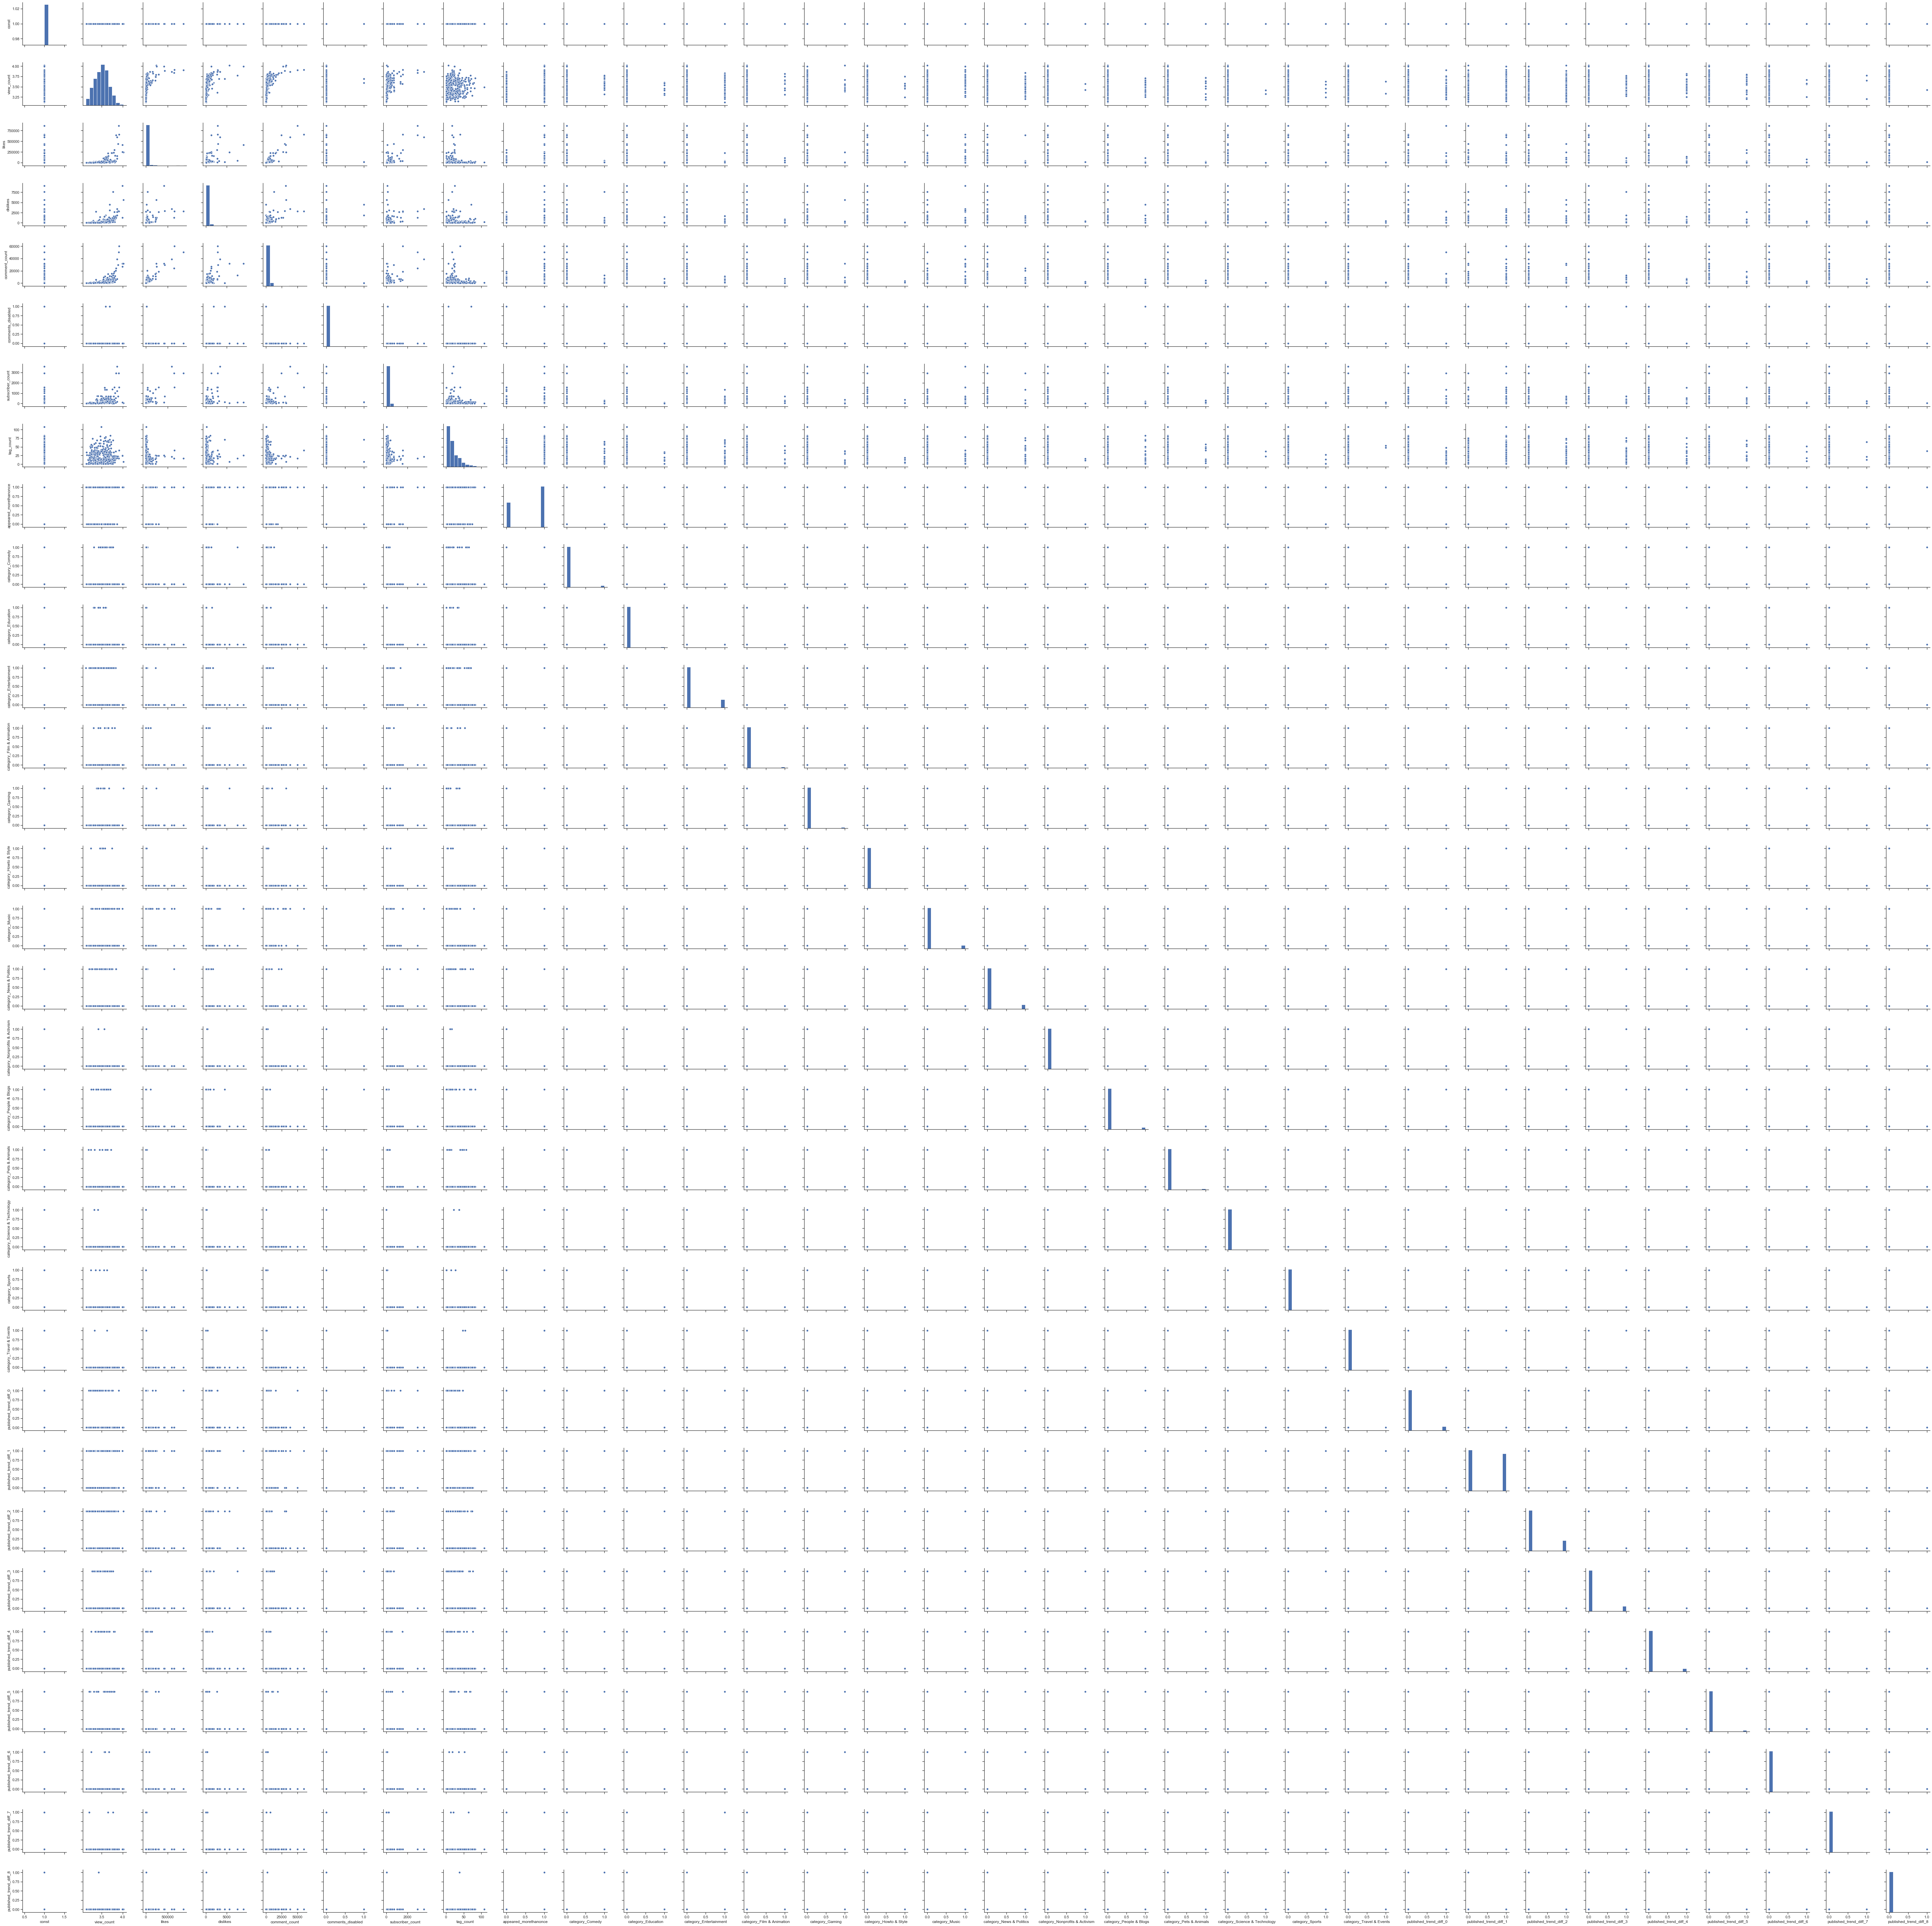

In [23]:
sns.set(style = "ticks", color_codes = True)
sns.pairplot(Data)